In [3]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting

h5_file_path = "/home/rebeccaz/Github/vampires_calibration/mcmc/675nm_no_IMR_offset_with_dichroic_uniform_priors_logf_and_jax.h5"
txt_file_path = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/675-50nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"


Chain shape (nsteps, nwalkers, ndim): (40000, 62, 13)


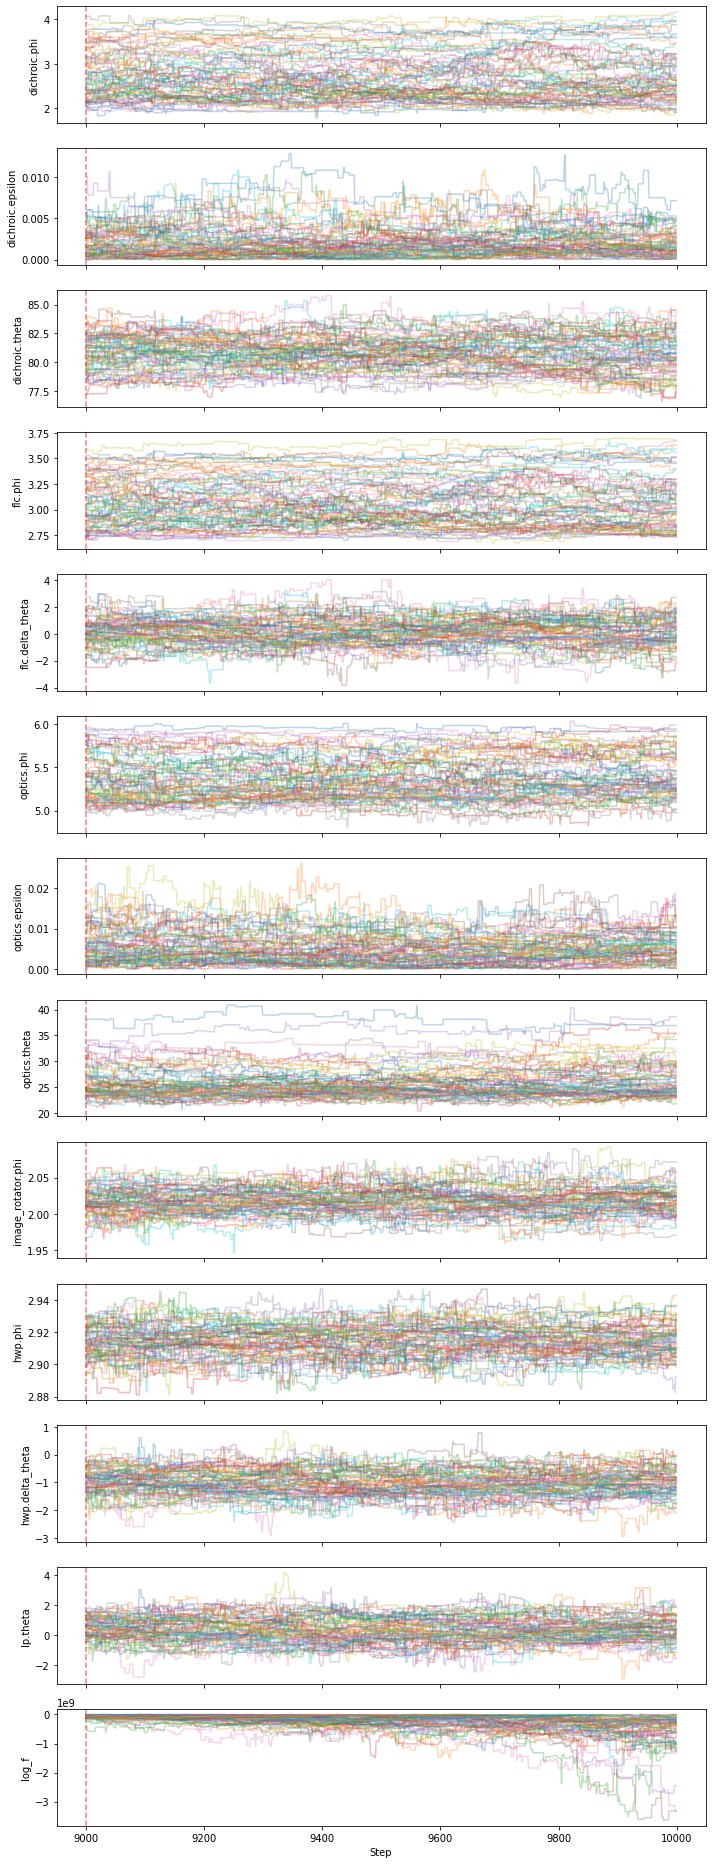

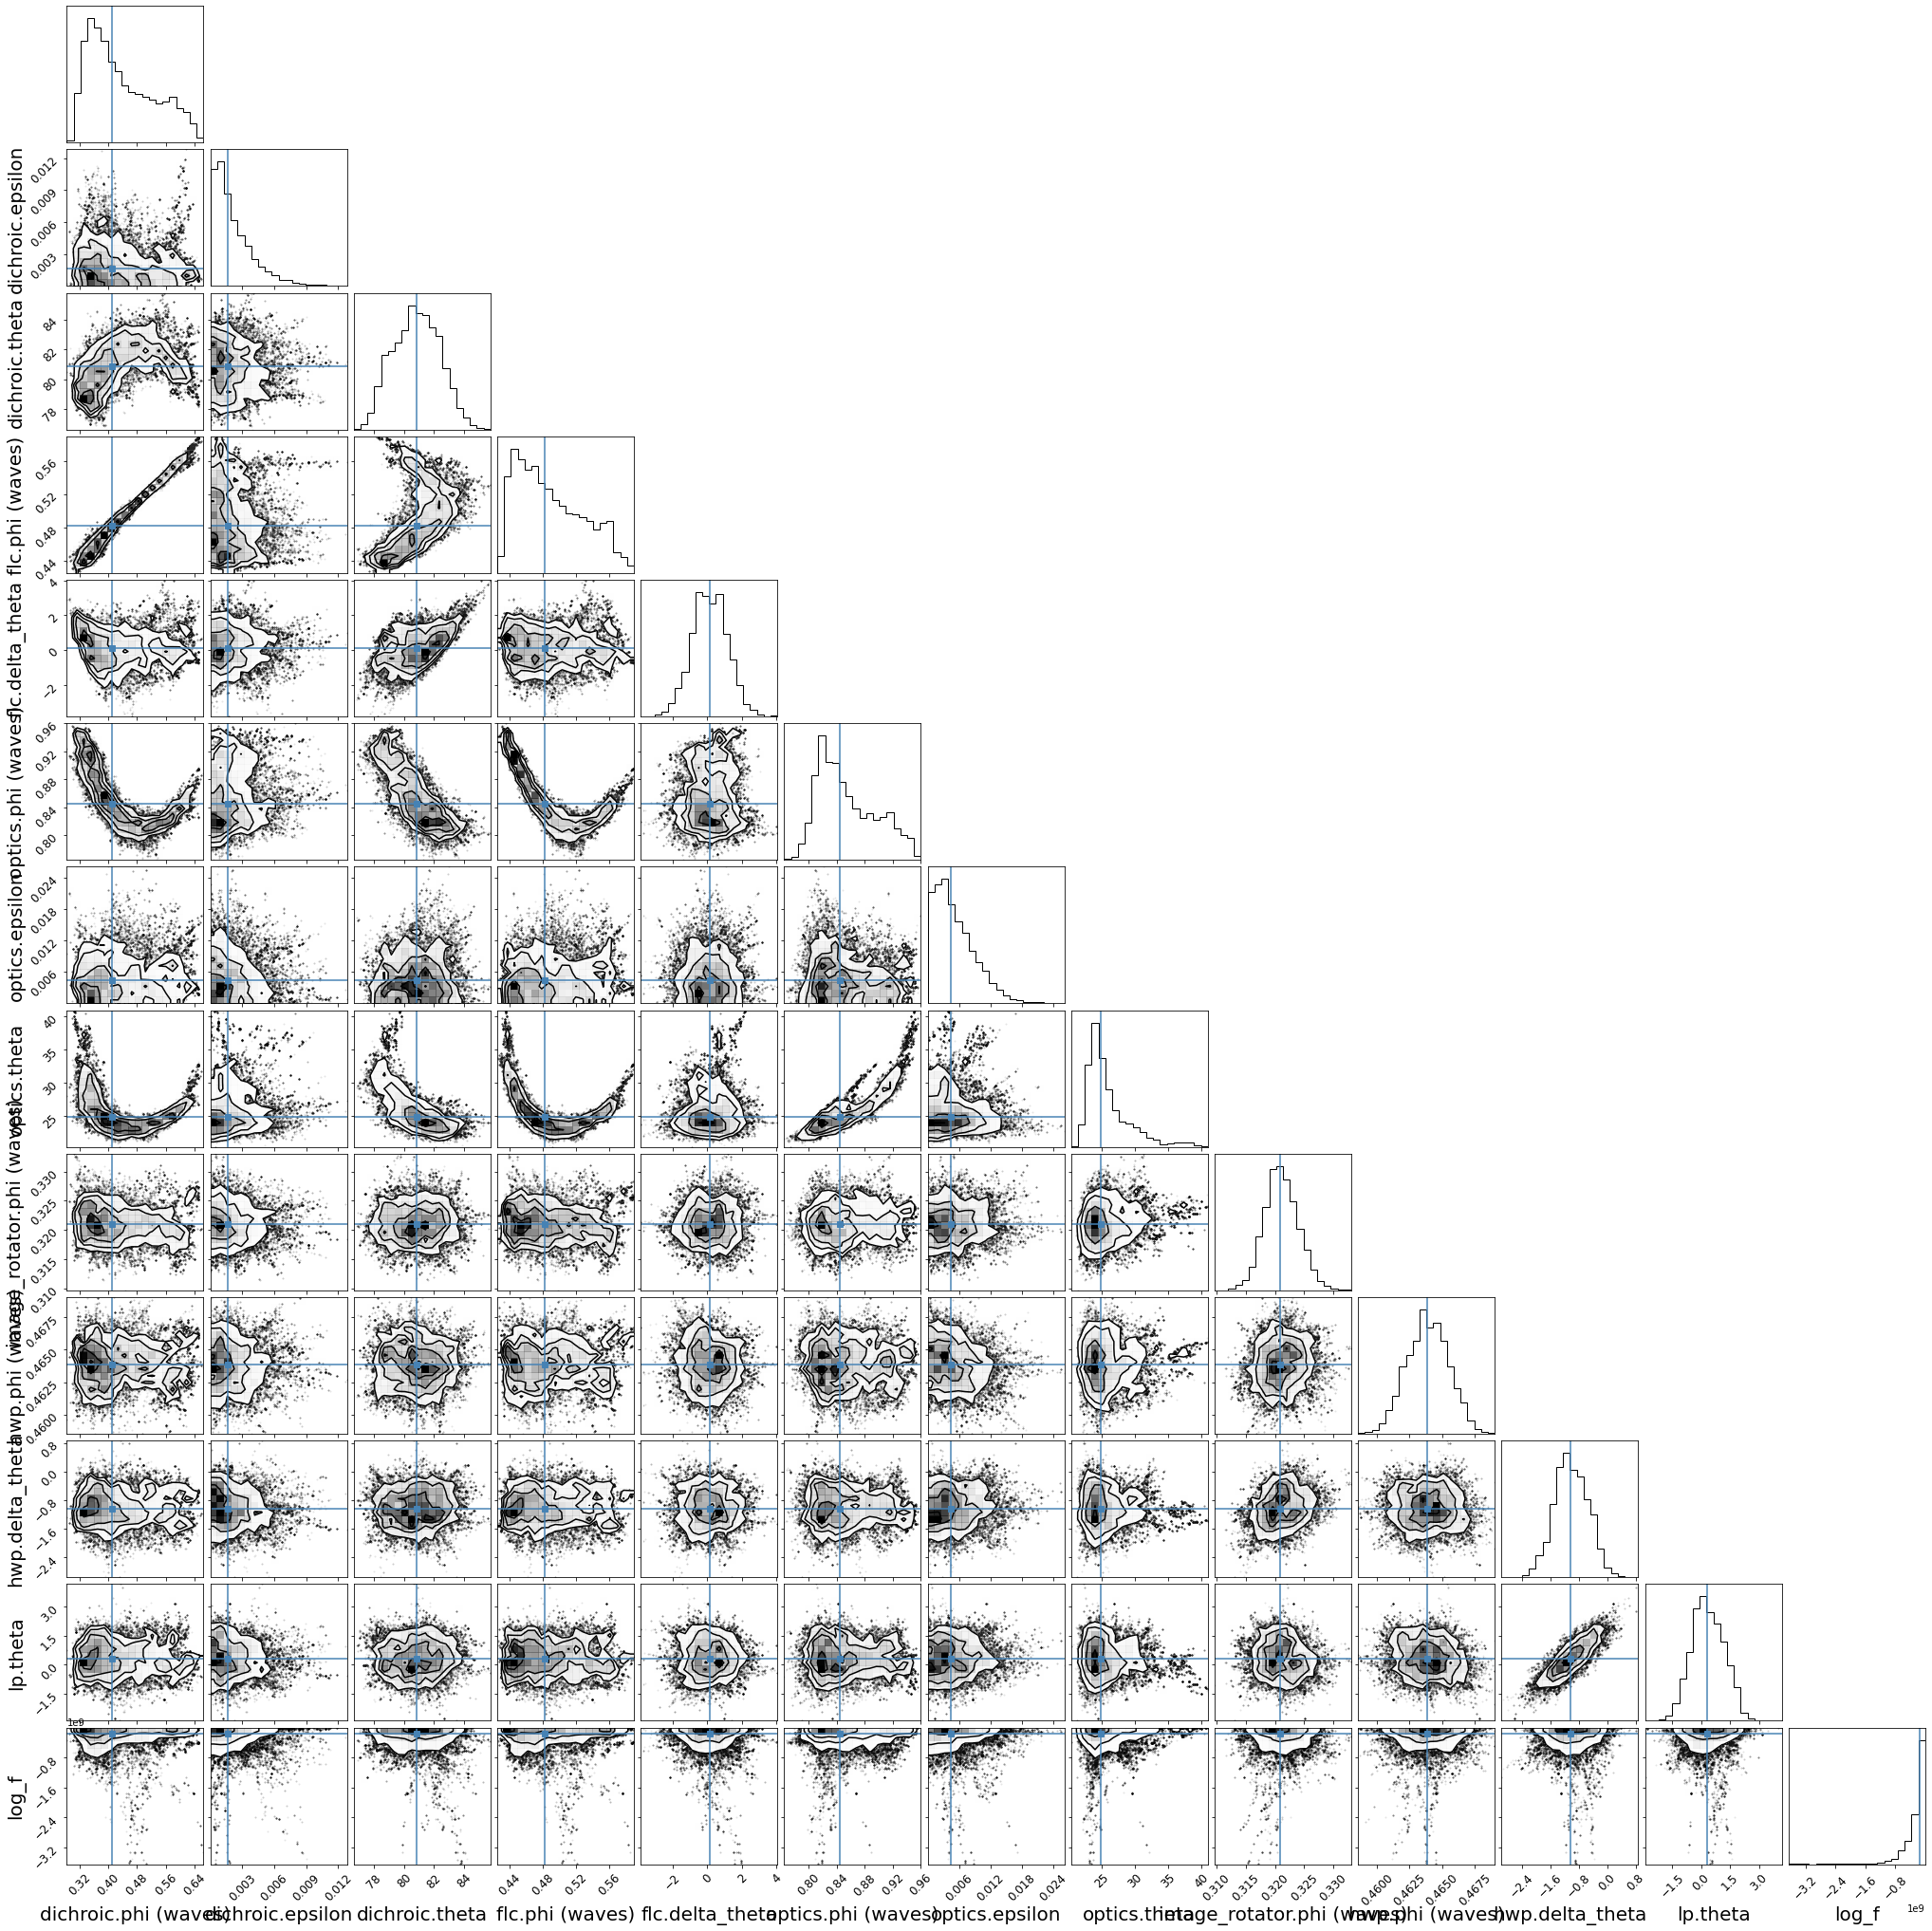

dichroic.phi (waves): 0.41143 ± 0.09101
dichroic.epsilon: 0.00162 ± 0.00186
dichroic.theta: 80.84336 ± 1.52095
flc.phi (waves): 0.48190 ± 0.03972
flc.delta_theta: 0.12524 ± 1.01247
optics.phi (waves): 0.84491 ± 0.04126
optics.epsilon: 0.00440 ± 0.00386
optics.theta: 24.82752 ± 3.35459
image_rotator.phi (waves): 0.32093 ± 0.00291
hwp.phi (waves): 0.46387 ± 0.00159
hwp.delta_theta: -1.03656 ± 0.46725
lp.theta: 0.29949 ± 0.83275
log_f: -154681116.49102 ± 328491923.98055


In [4]:
chain, names = plotting.load_chain_and_labels(h5_file_path, txt_file_path, include_logf = True)
step_range = (9000, 10000)

# Optional: Check chain shape after loading
print("Chain shape (nsteps, nwalkers, ndim):", chain.shape)

# Plot trace plots for MCMC chains
plotting.plot_trace(chain, names, step_range=step_range, max_walkers=100)

# Plot corner plot from flattened chain
plotting.plot_corner_flat(chain, names, step_range=step_range)

# Print median ± std for each parameter
plotting.summarize_posteriors(chain, names, step_range=step_range)


# Plotting Random Chains for Fitting 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


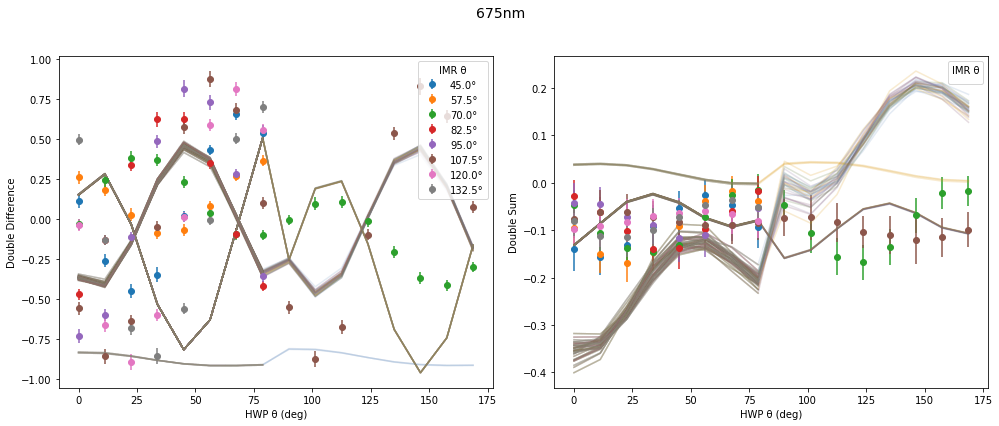

In [6]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting
import numpy as np

# Define the system configuration dictionary
system_dict = {
    "components": {
        "wollaston": {
            "type": "wollaston_prism_function",
            "properties": {"beam": "o", "transmission_ratio": 1.18},
        },
        "dichroic": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "flc": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "optics": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "image_rotator": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "hwp": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5, "theta": 0, "delta_theta": 0},
        },
        "lp": {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"theta": 0},
        },
    }
}

# Input paths and call plotting function
h5_filename = "675nm_no_IMR_offset_with_dichroic.h5"
txt_filename = "675-50nm.txt"
csv_file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"

plotting.plot_mcmc_fits_double_diff_sum(
    h5_filename=h5_filename,
    txt_filename=txt_filename,
    csv_path=csv_file_path,
    filter_wavelength="675-50",
    system_dict=system_dict,
    wavelength_str="675nm",
    n_samples=50,
    step_range = step_range
)
